In [11]:
import requests
import pandas as pd

# Historical Price Data Analysis

This section explores the historical price data API for HPG stock

In [ ]:
# Fetch historical price data from the API
from pathlib import Path

# API endpoint for historical price data
HISTORY_API_URL = "https://cafef1.mediacdn.vn/Images/Uploaded/DuLieuDownload/Liveboard/HPG_PriceHistory.json"

# Set up output directory
output_dir = Path("../data")
output_dir.mkdir(exist_ok=True)
csv_file = output_dir / "HPG_price_history.csv"

print("=" * 70)
print("HISTORICAL PRICE DATA EXPLORATION")
print("=" * 70)
print(f"\nAPI Endpoint: {HISTORY_API_URL}")
print(f"Output CSV: {csv_file.resolve()}")

# Fetch the data
try:
    response = requests.get(HISTORY_API_URL, timeout=15)
    response.raise_for_status()
    history_data = response.json()


    df = pd.DataFrame(history_data)
    df.to_csv(csv_file, index=False)
    
    print(f"\nStatus Code: {response.status_code}")
    print(f"Total records fetched: {len(history_data)}")
    
except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
    history_data = None

In [12]:
df = pd.read_csv("../data/HPG_price_history.csv")

In [13]:
print("\n" + "=" * 70)
print("DATAFRAME INFORMATION")
print("=" * 70)
print(f"\nShape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nFirst 5 records:")
print(df.head())
print(f"\nLast 5 records:")
print(df.tail())


DATAFRAME INFORMATION

Shape: 4495 rows × 20 columns

Columns: ['Symbol', 'TradeDate', 'BasicPrice', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'AveragePrice', 'Volume', 'ID', 'AdjustPrice', 'Ceiling', 'Floor', 'AverageAdjustPrice', 'TotalValue', 'AgreedVolume', 'AgreedValue', 'KLGDDot1', 'KLGDDot2', 'KLGDDot3']

Data Types:
Symbol                 object
TradeDate              object
BasicPrice            float64
OpenPrice             float64
HighPrice             float64
LowPrice              float64
ClosePrice            float64
AveragePrice          float64
Volume                float64
ID                      int64
AdjustPrice           float64
Ceiling               float64
Floor                 float64
AverageAdjustPrice    float64
TotalValue            float64
AgreedVolume          float64
AgreedValue           float64
KLGDDot1              float64
KLGDDot2              float64
KLGDDot3              float64
dtype: object

First 5 records:
  Symbol               TradeDat

In [14]:
# Data preprocessing and cleaning

# Sort by date
df = df.sort_values('TradeDate').reset_index(drop=True)

print("\n" + "=" * 70)
print("DATA STATISTICS & SUMMARY")
print("=" * 70)

print(f"\nDate Range:")
print(f"  From: {df['TradeDate'].min()}")
print(f"  To:   {df['TradeDate'].max()}")
print(f"  Total Trading Days: {len(df)}")

# Numeric statistics
numeric_cols = ['BasicPrice', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 
                'Volume', 'TotalValue', 'Ceiling', 'Floor']

print(f"\nKey Statistics:")
print(df[numeric_cols].describe())


DATA STATISTICS & SUMMARY

Date Range:
  From: 2007-11-15T00:00:00
  To:   2025-11-26T00:00:00
  Total Trading Days: 4495

Key Statistics:
        BasicPrice    OpenPrice    HighPrice     LowPrice   ClosePrice  \
count  4495.000000  4495.000000  4495.000000  4495.000000  4495.000000   
mean     37.222916    37.234605    37.716730    36.762547    37.229766   
std      15.371902    15.341242    15.526371    15.105412    15.329406   
min      12.100000    12.000000    12.450000    11.800000    12.100000   
25%      26.400000    26.400000    26.750000    26.100000    26.400000   
50%      32.200000    32.100000    32.600000    31.900000    32.200000   
75%      45.500000    45.575000    46.200000    44.975000    45.575000   
max     127.000000   130.000000   130.000000   121.000000   127.000000   

             Volume    TotalValue      Ceiling        Floor  
count  4.495000e+03  4.495000e+03  4495.000000  4495.000000  
mean   9.365609e+06  3.013242e+11    43.794839    32.869021  
std    

In [15]:
# Calculate additional metrics
# Price changes
df['Daily_Change'] = df['ClosePrice'] - df['OpenPrice']
df['Daily_Change_Pct'] = ((df['ClosePrice'] - df['OpenPrice']) / df['OpenPrice'] * 100).round(2)
df['High_Low_Range'] = df['HighPrice'] - df['LowPrice']

# Price momentum (simple)
df['Price_vs_Ref'] = df['ClosePrice'] - df['BasicPrice']
df['Price_vs_Ref_Pct'] = ((df['ClosePrice'] - df['BasicPrice']) / df['BasicPrice'] * 100).round(2)

# Average price per share
df['Avg_Price_Per_Share'] = (df['TotalValue'] / (df['Volume'] * 1e9)).round(2)

print("\n" + "=" * 70)
print("CALCULATED METRICS")
print("=" * 70)
print(f"\nDaily Price Changes:")
print(df[['TradeDate', 'OpenPrice', 'ClosePrice', 'Daily_Change', 'Daily_Change_Pct']].head(10))
print(f"\nPrice Range Analysis:")
print(df[['TradeDate', 'LowPrice', 'HighPrice', 'High_Low_Range', 'Volume']].tail(10))


CALCULATED METRICS

Daily Price Changes:
             TradeDate  OpenPrice  ClosePrice  Daily_Change  Daily_Change_Pct
0  2007-11-15T00:00:00      130.0       127.0          -3.0             -2.31
1  2007-11-16T00:00:00      121.0       121.0           0.0              0.00
2  2007-11-19T00:00:00      115.0       115.0           0.0              0.00
3  2007-11-20T00:00:00      110.0       110.0           0.0              0.00
4  2007-11-21T00:00:00      105.0       114.0           9.0              8.57
5  2007-11-22T00:00:00      114.0       114.0           0.0              0.00
6  2007-11-23T00:00:00      111.0       110.0          -1.0             -0.90
7  2007-11-26T00:00:00      108.0       109.0           1.0              0.93
8  2007-11-27T00:00:00      108.0       105.0          -3.0             -2.78
9  2007-11-28T00:00:00      106.0       107.0           1.0              0.94

Price Range Analysis:
                TradeDate  LowPrice  HighPrice  High_Low_Range      Volume
44

TypeError: 'NoneType' object is not subscriptable

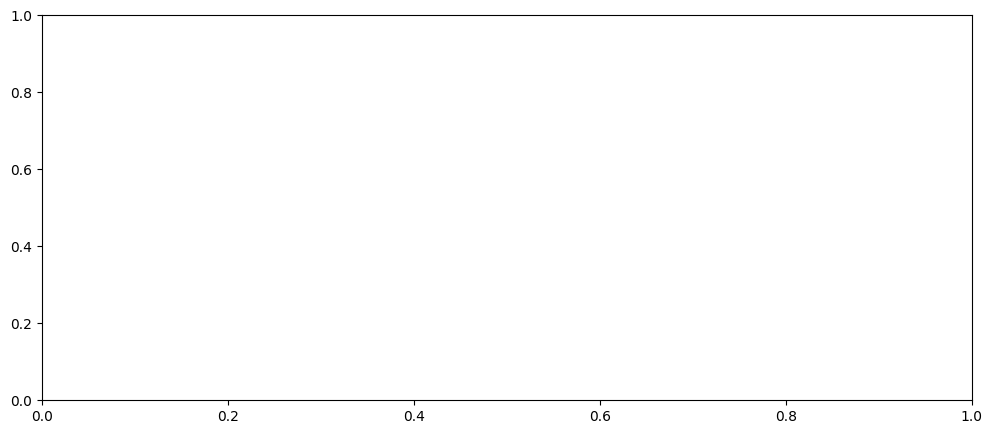

In [ ]:
# Full-resolution Matplotlib (no sampling)
import matplotlib as mpl
import matplotlib.pyplot as plt

# Help Matplotlib draw long lines faster
mpl.rcParams['agg.path.chunksize'] = 10000  # chunk long paths into pieces

# Ensure datetime column
df['TradeDate'] = pd.to_datetime(df['TradeDate'], format='mixed')
df = df.sort_values('TradeDate').reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df['TradeDate'], df['AdjustPrice'], color='tab:blue', linewidth=1, linestyle='-',
        marker=None)                 # NO markers
# Rasterize the filled area so the vector backend does not become heavy
ax.fill_between(df['TradeDate'], df['LowPrice'], df['HighPrice'],
                color='gray', alpha=0.12, rasterized=True)

ax.set_title('HPG — Full data')
ax.set_xlabel('Date'); ax.set_ylabel('Price (₫)')
ax.grid(alpha=0.25)
plt.tight_layout()
plt.show()